**Charger les librairies nécéssaires**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Charger le fichier avito_cars_clean.csv**

In [5]:
# Lecture du fichier nettoyé
df = pd.read_csv("data/avito_cars_clean.csv")

# Afficher les cinq premières lignes des données
df.head()

,annee,boite,carburant,kilometrage,marque,modele,nombre_portres,premiere_main,puissance_fiscale,etat,prix
0,2023,Automatique,Essence,22499.5,Alfa Romeo,Tonale,5,Oui,8,Excellent,306000
1,2018,Manuelle,Diesel,104999.5,Dacia,Duster,5,Oui,6,Excellent,155000
2,2023,Automatique,Diesel,67499.5,Hyundai,Accent,5,Oui,6,Excellent,179000
3,2023,Automatique,Diesel,22499.5,Peugeot,5008,5,Oui,8,Excellent,349000
4,2021,Automatique,Diesel,77499.5,Kia,Sportage,5,Oui,12,Très bon,685000


**ÉTAPES DE NETTOYAGE DES DONNÉES**

***Supprimer les colonnes inutiles***

In [ ]:

# Vérifier les valeurs manquantes
df.isnull().sum()

# Si tout va bien, on passe à l'encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)

# Séparation des variables explicatives (X) et de la variable cible (y)
X = df_encoded.drop("prix", axis=1)
y = df_encoded["prix"]

# Diviser le dataset en 80% d'entraînement et 20% de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



***Vérification des valeurs manquantes (NaN)***

In [7]:
df.isnull().sum()

annee                0
boite                0
carburant            0
kilometrage          0
marque               0
modele               0
nombre_portres       0
premiere_main        0
puissance_fiscale    0
etat                 0
prix                 0
dtype: int64

***Vérification des types de données***

In [8]:
df.dtypes

annee                  int64
boite                 object
carburant             object
kilometrage          float64
marque                object
modele                object
nombre_portres         int64
premiere_main         object
puissance_fiscale      int64
etat                  object
prix                   int64
dtype: object

***Vérification des outliers (valeurs aberrantes)***

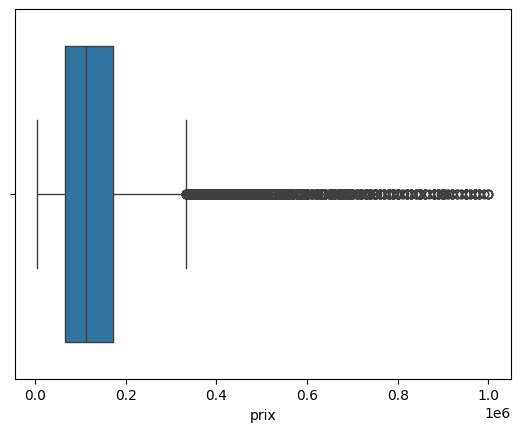

In [9]:
# Boxplot pour la colonne 'prix'
sns.boxplot(x=df['prix'])
plt.show()

***Vérification des valeurs uniques pour les variables catégorielles***

In [10]:
df['boite'].unique()
df['carburant'].unique()
df['marque'].unique()

array(['Alfa Romeo', 'Dacia', 'Hyundai', 'Peugeot', 'Kia', 'Fiat',
       'Renault', 'Skoda', 'Porsche', 'Nissan', 'Mercedes-Benz',
       'Volkswagen', 'Honda', 'Land Rover', 'Volvo', 'Mini', 'Ford',
       'Audi', 'Geely', 'Seat', 'Toyota', 'Jaguar', 'BMW', 'Opel', 'Jeep',
       'Citroen', 'Chevrolet', 'Iveco', 'Mitsubishi', 'Foton', 'MG',
       'Suzuki', 'Daihatsu', 'Autres', 'Mazda', 'Infiniti', 'Cupra',
       'Chery', 'Tesla', 'Maserati', 'Bentley', 'Mahindra', 'Lancia',
       'Abarth', 'Rover', 'DS', 'Ssangyong', 'DFSK', 'Lexus', 'Lifan',
       'Isuzu', 'Zotye', 'Subaru', 'Chrysler', 'Tata', 'Daewoo', 'Dodge',
       'Changan', 'BYD', 'GWM Motors', 'GAZ', 'Faw', 'Cadillac', 'SERES',
       'Changhe', 'Ferrari', 'GMC', 'Smart', 'Hummer', 'AC', 'Lincoln',
       'Force', 'Rolls-Royce', 'Lada', 'UFO'], dtype=object)

***Vérification des noms des colonnes (comme précédemment)***

In [11]:
df.columns

Index(['annee', 'boite', 'carburant', 'kilometrage', 'marque', 'modele',
       'nombre_portres', 'premiere_main', 'puissance_fiscale', 'etat', 'prix'],
      dtype='object')

***Initialiser le modèle Lasso***

In [12]:
# Créer une instance du modèle Lasso
lasso = Lasso(alpha=0.1)  # alpha peut être ajusté en fonction de l'importance de la régularisation


**Entraîner le modèle**

In [13]:
# Entraîner le modèle Lasso sur les données d'entraînement
lasso.fit(X_train, y_train)

C:\Users\ss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+14, tolerance: 7.003e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

**Faire des prédictions**

In [14]:
# Prédire les prix sur le jeu de test
y_pred = lasso.predict(X_test)


**Évaluer les performances du modèle**

In [15]:
# Calculer les métriques d'évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = (mean_squared_error(y_test, y_pred))**0.5
r2 = r2_score(y_test, y_pred)

# Approximation de l'accuracy
accuracy_approx = 100 - rmse  # C'est une approximation, pas une véritable accuracy.

# 8. Afficher les résultats
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² (coefficient de détermination): {r2}")
print(f"Approximation de l'Accuracy: {accuracy_approx}%")


Mean Absolute Error (MAE): 32542.209314852636
Root Mean Squared Error (RMSE): 62973.77162169713
R² (coefficient de détermination): 0.6840222530254232
Approximation de l'Accuracy: -62873.77162169713%


**Visualisation des résultats**

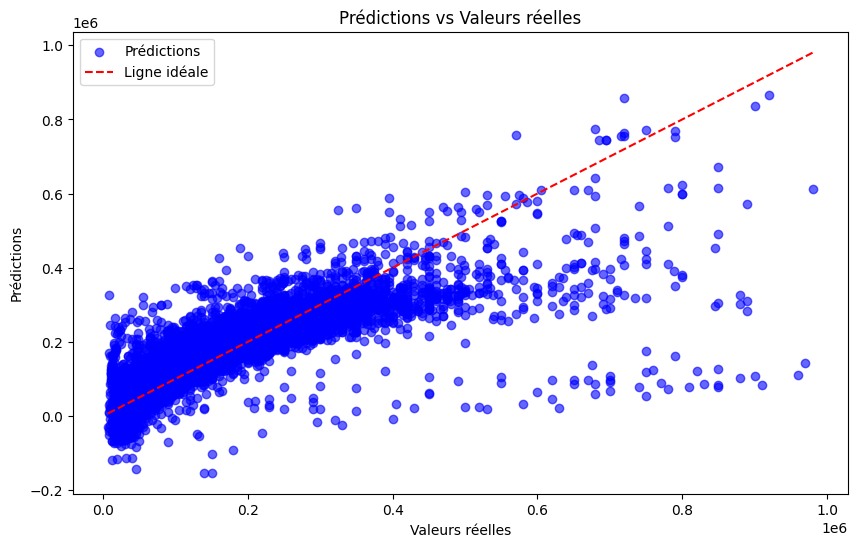

In [16]:
# Prédiction vs Valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prédictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ligne idéale', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.legend()
plt.show()